In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score
df=pd.read_csv('C:\Titanic passenger details\Titanic-Dataset.csv')
df=df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
df['Sex']=df['Sex'].map({'male':0,'female':1})
df['Embarked']=df['Embarked'].fillna('S')
df['Embarked']=df['Embarked'].map({'S':0, 'C':1, 'Q':2})
df['Age']=df['Age'].fillna(df['Age'].median())
df=df.dropna()
X=df.drop('Survived',axis=1)
y=df['Survived']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=45)
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print('Accuracy:',accuracy*100)
print('F1 Score:',f1*100)
print('Prediction Dataset Percentage:',len(X_test)/len(df)*100)

Accuracy: 82.6330532212885
F1 Score: 75.59055118110236
Prediction Dataset Percentage: 40.06734006734007


In [10]:
df=pd.read_csv('C:\Titanic passenger details\Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


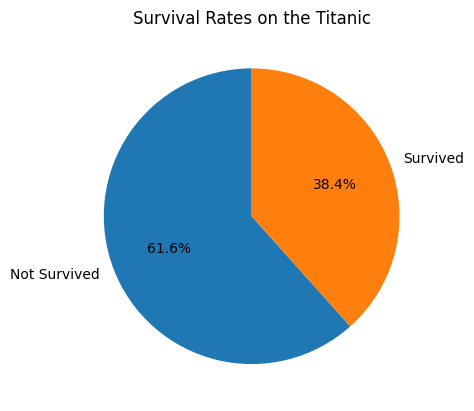

In [11]:
survival_counts=df['Survived'].value_counts()
plt.pie(survival_counts,labels=['Not Survived','Survived'],autopct='%1.1f%%',startangle=90)
plt.title('Survival Rates on the Titanic')
plt.show()

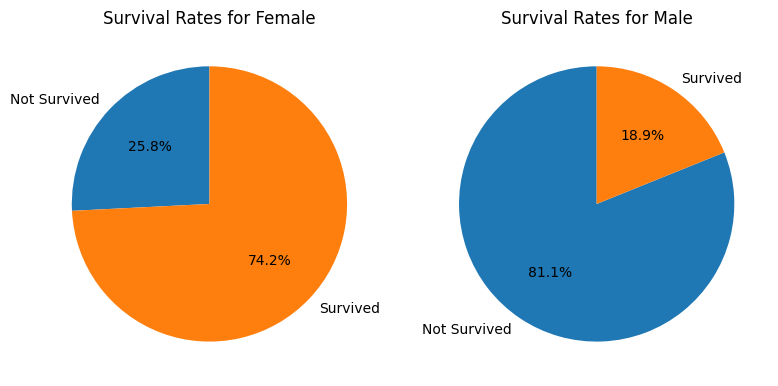

In [4]:
survival_by_gender = df.groupby(['Sex', 'Survived'])['Survived'].count().unstack()
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
for i, (sex, data) in enumerate(survival_by_gender.iterrows()):
    labels = ['Not Survived', 'Survived']
    ax = axes[i]
    ax.pie(data, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Survival Rates for {"Female" if sex == "female" else "Male"}')
plt.tight_layout()
plt.show()

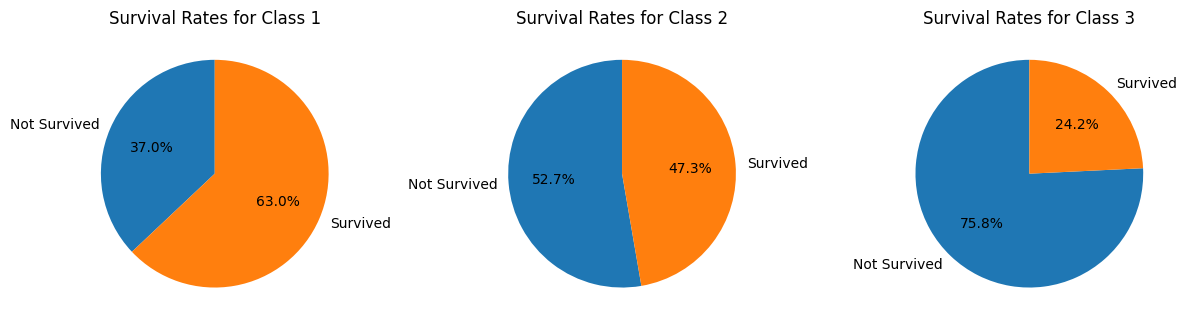

In [12]:
survival_by_class=df.groupby(['Pclass','Survived'])['Survived'].count().unstack()
fig,axes=plt.subplots(1,3,figsize=(12,4))
for i,(pclass,data) in enumerate(survival_by_class.iterrows()):
  labels=['Not Survived','Survived']
  ax=axes[i]
  ax.pie(data,labels=labels,autopct='%1.1f%%',startangle=90)
  ax.set_title(f'Survival Rates for Class {pclass}')
plt.tight_layout()
plt.show()

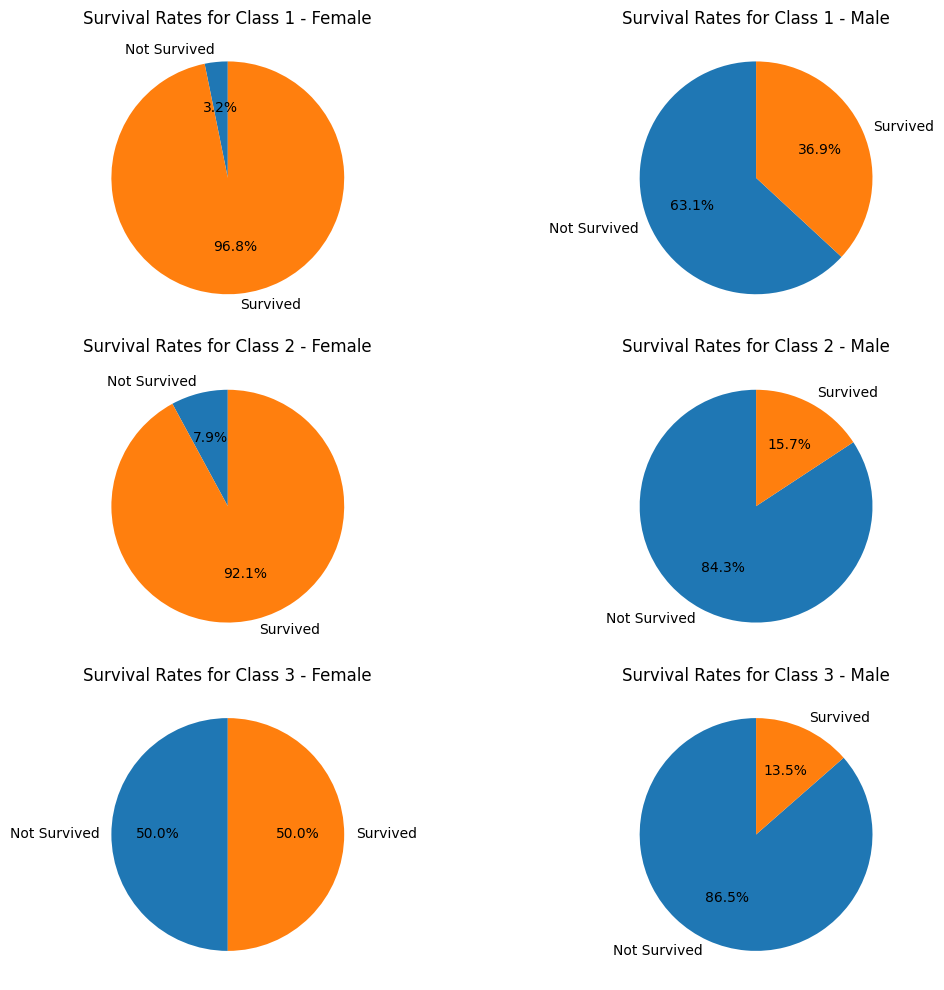

In [13]:
survival_by_class_gender=df.groupby(['Pclass','Sex','Survived'])['Survived'].count().unstack()
fig,axes=plt.subplots(3,2,figsize=(12,10))
for i,(pclass,data) in enumerate(survival_by_class_gender.groupby(level='Pclass')):
  for j,(sex,sub_data) in enumerate(data.groupby(level='Sex')):
    ax=axes[i,j]
    labels=['Not Survived','Survived']
    ax.pie(sub_data.values.flatten(), labels=labels, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Survival Rates for Class {pclass} - {"Female" if sex == "female" else "Male"}')
plt.tight_layout()
plt.show()